# Path Selection Overview

In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from matplotlib import colormaps

sys.path.append('/mnt/data1/spatial/tissue-alignment/traversal')
from io_utils import read_image, read_spatial_data

%matplotlib inline

In [2]:
section_path = '/mnt/data1/spatial/data/colon/UC/B'
fullres = False
im = read_image(section_path, fullres)
pos_df, spot_radius = read_spatial_data(section_path, fullres)

In [3]:
bounds = np.load('colon-UC-B-boundaries.npy', allow_pickle=True)

In [4]:
aa = set(bounds[0])
bb = set(bounds[-1])
aa_list = pos_df.loc[list(aa)].sort_values('y').index.tolist()
bb_list = pos_df.loc[list(bb)].sort_values('y').index.tolist()

In [5]:
cmap = colormaps['cool']
cmap_interp = np.linspace(0, 1, max(len(aa_list), len(bb_list)))[::-1]
# cmap(cmap_interp[i])

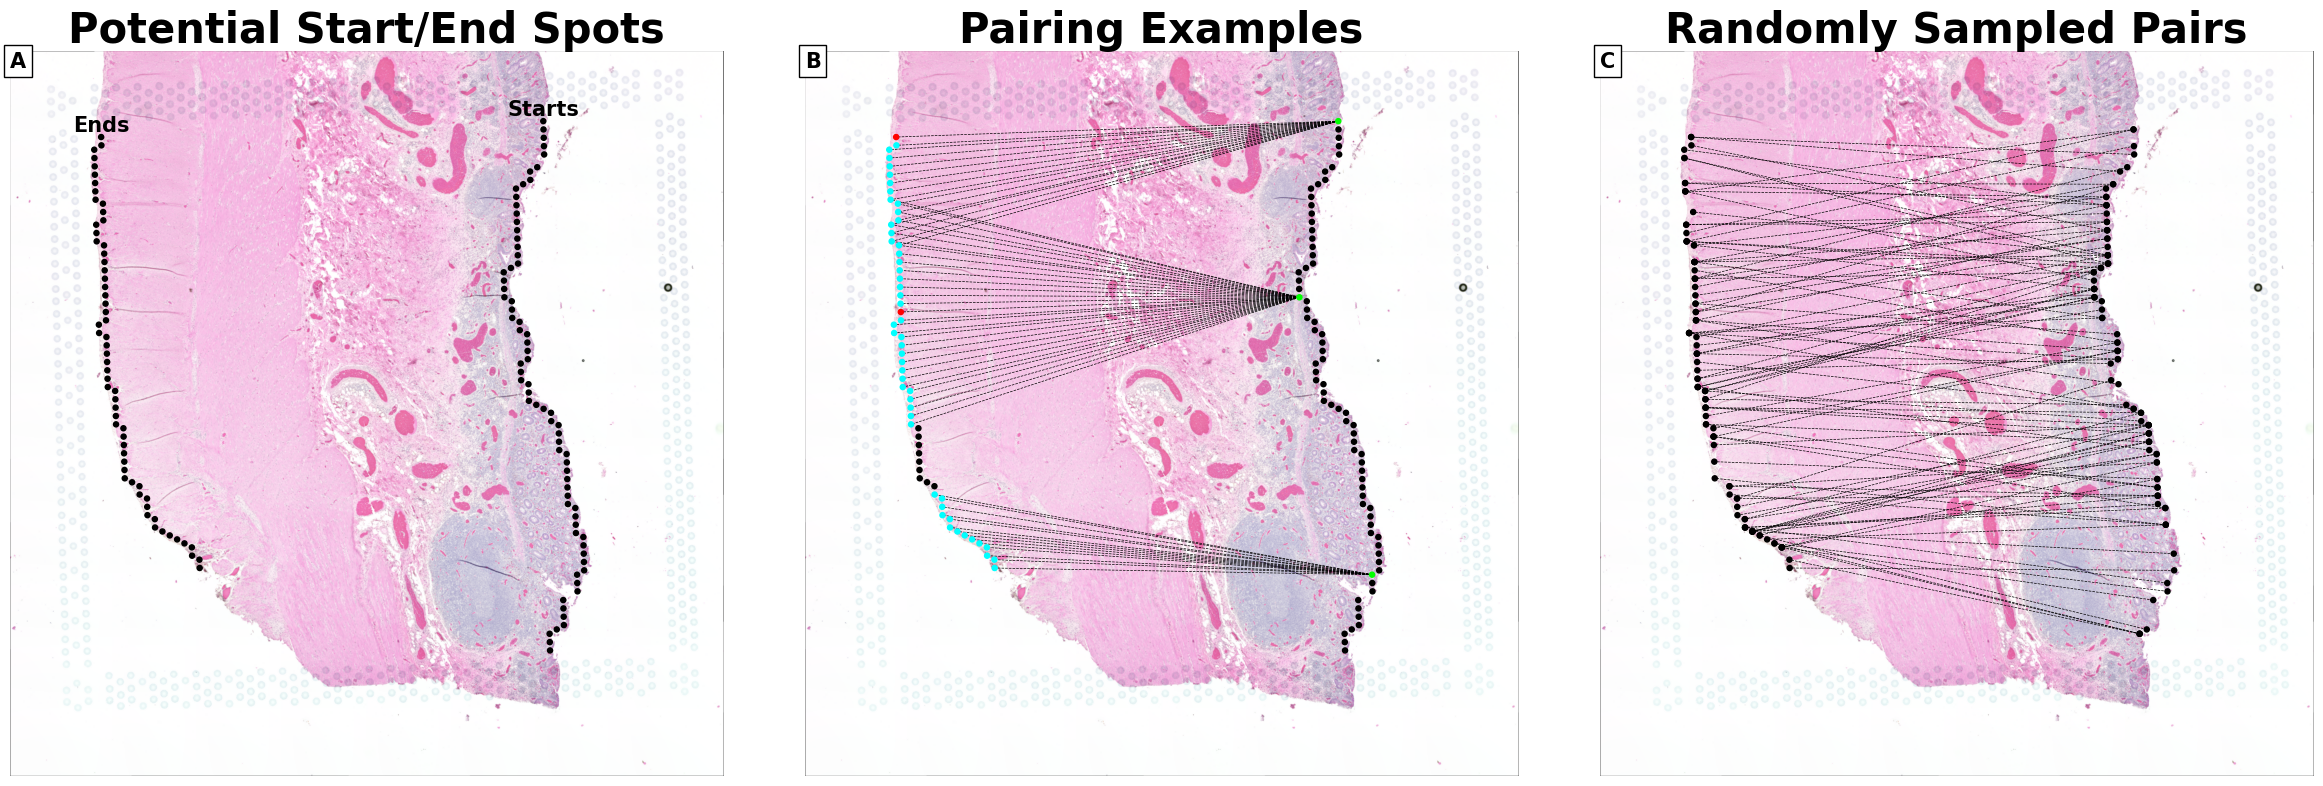

In [12]:
figsize = 8
fontsize = 15
nrows = 1
ncols = 3

radius = 15
combos = pd.read_csv('path_combos_sampled.csv')

plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(nrows, ncols, figsize=(figsize * ncols, figsize * nrows))

ax1.imshow(im)
ax1.set_axis_off()

for idxs in [aa_list, bb_list]:
    for i, (x, y) in enumerate(pos_df.loc[idxs, ['x', 'y']].to_numpy()):
        circ = Circle(
            (x, y),
            spot_radius,
            # color=cmap(cmap_interp[i]),
            color='black'
        )
        ax1.add_artist(circ)
ax1.annotate("Starts", pos_df.loc[aa_list[0], ['x', 'y']] + [0, -5], color="black", ha='center', va='bottom', fontsize=fontsize, weight="bold")
ax1.annotate("Ends", pos_df.loc[bb_list[0], ['x', 'y']] + [0, -5], color="black", ha='center', va='bottom', fontsize=fontsize, weight="bold")

start_1 = 23
start_1_xy = pos_df.loc[aa_list[start_1], ['x', 'y']]
start_2 = 63
start_2_xy = pos_df.loc[aa_list[start_2], ['x', 'y']]
start_3 = 0
start_3_xy = pos_df.loc[aa_list[start_3], ['x', 'y']]

ends_1 = [x for x in list(range(start_1 - radius, start_1 + radius + 1)) if x < len(bb_list) and x >= 0]
ends_2 = [x for x in list(range(start_2 - radius, start_2 + radius + 1)) if x < len(bb_list) and x >= 0]
ends_3 = [x for x in list(range(start_3 - radius, start_3 + radius + 1)) if x < len(bb_list) and x >= 0]

ax2.imshow(im)
ax2.set_axis_off()
for i, (x, y) in enumerate(pos_df.loc[aa_list, ['x', 'y']].to_numpy()):
    color = 'black'
    if i in [start_1, start_2, start_3]:
        color = 'lime'
    circ = Circle((x, y), spot_radius, color=color, zorder=3)
    ax2.add_artist(circ)

for i, (x, y) in enumerate(pos_df.loc[bb_list, ['x', 'y']].to_numpy()):
    color = 'black'
    if i in ends_1:
        ax2.plot([start_1_xy[0], x], [start_1_xy[1], y], color='black', alpha=1, ls='--', lw=0.5)
        color = 'aqua'
    if i in ends_2:
        ax2.plot([start_2_xy[0], x], [start_2_xy[1], y], color='black', alpha=1, ls='--', lw=0.5)
        color = 'aqua'
    if i in ends_3:
        ax2.plot([start_3_xy[0], x], [start_3_xy[1], y], color='black', alpha=1, ls='--', lw=0.5)
        color = 'aqua'
    if i in [start_1, start_2, start_3]:
        color = 'red'
    circ = Circle((x, y), spot_radius, color=color, zorder=3)
    ax2.add_artist(circ)

ax3.imshow(im)
ax3.set_axis_off()
for (x1, y1), (x2, y2) in zip(
    pos_df.loc[combos['start'], ['x', 'y']].to_numpy(),
    pos_df.loc[combos['end'], ['x', 'y']].to_numpy(),
):
    color = 'black'
    circ1 = Circle((x1, y1), spot_radius, color=color, zorder=3)
    circ2 = Circle((x2, y2), spot_radius, color=color, zorder=3)
    ax3.add_artist(circ1)
    ax3.add_artist(circ2)
    ax3.plot([x1, x2], [y1, y2], color='black', alpha=1, ls='--', lw=0.5)

fig.tight_layout()
fig.subplots_adjust(top=0.925)
ax1.set_title('Potential Start/End Spots', fontsize=fontsize*2, weight='bold')
ax2.set_title('Pairing Examples', fontsize=fontsize*2, weight='bold')
ax3.set_title('Randomly Sampled Pairs', fontsize=fontsize*2, weight='bold')

ax1_bbox = ax1.get_position()
ax2_bbox = ax2.get_position()
ax3_bbox = ax3.get_position()
fig.text(ax1_bbox.xmin, ax1_bbox.ymax, 'A', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax2_bbox.xmin, ax2_bbox.ymax, 'B', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})
fig.text(ax3_bbox.xmin, ax3_bbox.ymax, 'C', ha='left', va='top', fontsize=fontsize, weight='bold', bbox={'facecolor':'white', 'edgecolor':'black'})

fig.savefig('fig4.png')
fig.savefig('fig4.pdf')